In [1]:
%load_ext autoreload
%autoreload 2

import image_utils
from model import ImageModel
from PIL import Image
from io import BytesIO
import requests

In [2]:
# modelの読み込み
model = ImageModel('sample_model')

In [4]:
# modelへの入力サイズを取得
input_shape = model.get_input_shape('sample_model/signature.json')
print(f'modelへの入力サイズ: {input_shape}')

modelへの入力サイズ: [224, 224]


## ローカルの画像を使用して予測を行う場合

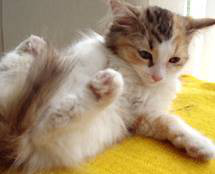

In [4]:
# labelを予測する画像の確認
Image.open('sample_image/cat/cat.105.jpg')

In [5]:
# 画像をmodelへの入力サイズに変換: [1, input_width, input_height, input_channel]
image = image_utils.preprocess_from_file('sample_image/cat/cat.105.jpg', 
                                         input_width=input_shape[0], input_height=input_shape[1])
# 予測実行
model.predict(image)

'cat'

In [6]:
# *input_shapeを引数にすることで展開されてそれぞれの要素が個別の引数として渡されるのでおなじ結果を得ることができる。
image = image_utils.preprocess_from_file('sample_image/cat/cat.105.jpg', *input_shape)
model.predict(image)

'cat'

## WEB上の画像を使用して予測を行う場合

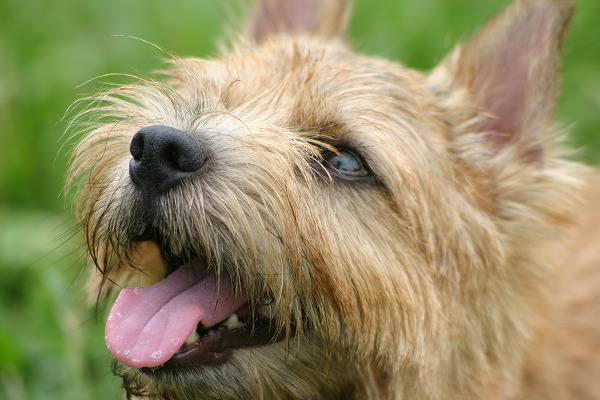

In [6]:
image = BytesIO(requests.get('https://pro-foto.jp/free/img/images_big/dog0149-041.jpg').content)
Image.open(image)

In [6]:
image = image_utils.preprocess_from_url('https://pro-foto.jp/free/img/images_big/dog0149-041.jpg', 
                                        input_width=input_shape[0], input_height=input_shape[1])
model.predict(image)

'dog'

In [12]:
# *input_shapeを引数にすることで展開されてそれぞれの要素が個別の引数として渡されるのでおなじ結果を得ることができる。
image = image_utils.preprocess_from_url('https://pro-foto.jp/free/img/images_big/dog0149-041.jpg', *input_shape)
model.predict(image)

'dog'